In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
sns.set_theme(style="white")

import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
%matplotlib inline
import math
from scipy import stats

from pandas.tseries.holiday import USFederalHolidayCalendar as calendar


In [2]:
df = pd.read_csv('nyc_taxis.csv', delimiter=',', header=0, index_col=0)

In [3]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
id,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1458644 entries, id2875421 to id1209952
Data columns (total 10 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   vendor_id           1458644 non-null  int64  
 1   pickup_datetime     1458644 non-null  object 
 2   dropoff_datetime    1458644 non-null  object 
 3   passenger_count     1458644 non-null  int64  
 4   pickup_longitude    1458644 non-null  float64
 5   pickup_latitude     1458644 non-null  float64
 6   dropoff_longitude   1458644 non-null  float64
 7   dropoff_latitude    1458644 non-null  float64
 8   store_and_fwd_flag  1458644 non-null  object 
 9   trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(3)
memory usage: 122.4+ MB


# Qusetion1.2

In [5]:
def haversine_dist(lon1, lat1, lon2, lat2):
    """Calculate the great circle distance in kilometers between two points 
    on the earth (specified in decimal degrees)
    
    :params lon1: First point longitude in degrees
    :params lat1: First point latitude in degrees
    :params lon2: Second point longitude in degress
    :params lat2: Second point latitude in degrees
    
    :returns distance in kilometers
    """
    # Convert decimal degrees to radians 
    lon1 = np.deg2rad(lon1)
    lat1 = np.deg2rad(lat1)
    lon2 = np.deg2rad(lon2)
    lat2 = np.deg2rad(lat2)

    # haversine formula 
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2)**2
    c = 2 * np.arcsin(np.sqrt(a))
    r = 6371 # Radius of earth(km)
    
    distance = c*r
    
    return np.round(distance,decimals=3)

In [6]:
df['trip_distance(km)'] = haversine_dist(df['pickup_longitude'], df['pickup_latitude'], 
              df['dropoff_longitude'], df['dropoff_latitude'])
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km)
id,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.499
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189


## Create Average speed column

In [7]:
df['avg_speed(km/hr)'] = df['trip_distance(km)']/(df['trip_duration'].apply(lambda x: x/3600))
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km),avg_speed(km/hr)
id,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.499,11.860220
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806,9.806335
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385,10.822034
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485,12.461538
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189,9.840000


## Create date columns

In [8]:
# Year
df['trip_year'] = pd.to_datetime(df['pickup_datetime']).dt.year

# Month
df['trip_month'] = pd.to_datetime(df['pickup_datetime']).dt.month

# Day_of_week
df['trip_weekday'] = pd.to_datetime(df['pickup_datetime']).dt.weekday

In [9]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km),avg_speed(km/hr),trip_year,trip_month,trip_weekday
id,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.499,11.860220,2016,3,0
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806,9.806335,2016,6,6
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385,10.822034,2016,1,1
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485,12.461538,2016,4,2
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189,9.840000,2016,3,5


# Question 1.1

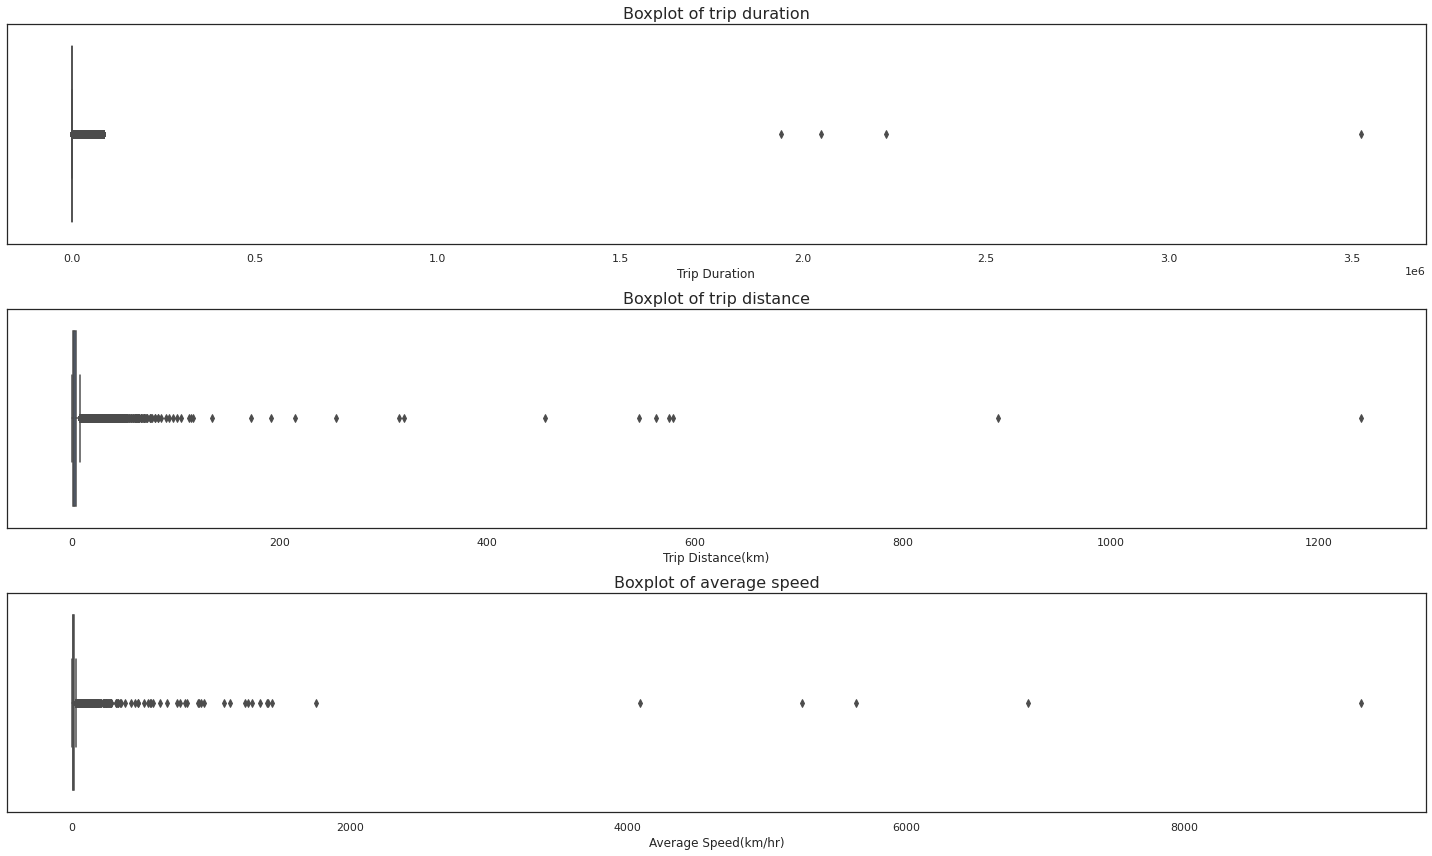

In [10]:
# Plots
fig, axes = plt.subplots(figsize=(20,12),nrows=3, ncols = 1)

sns.boxplot(x=df['trip_duration'], ax=axes[0])
axes[0].set_title('Boxplot of trip duration',fontsize=16)
axes[0].set_xlabel('Trip Duration')

sns.boxplot(x=df['trip_distance(km)'], ax=axes[1])
axes[1].set_title('Boxplot of trip distance',fontsize=16)
axes[1].set_xlabel('Trip Distance(km)')

sns.boxplot(x=df['avg_speed(km/hr)'], ax=axes[2])
axes[2].set_title('Boxplot of average speed',fontsize=16)
axes[2].set_xlabel('Average Speed(km/hr)')

plt.tight_layout()
plt.show()

**Inital observations:**

* From the plots above we can see that there clearly some outliers in the dataset.
* The trip duration plot: It looks like the outliers occur from around $2.0\times 10^{6}$seconds. This is roughly equal to 555 hours. This is not really possible.
* The trip distance plot: Some of the values from above 200km could be outliers but we can investigate further.
* The average speed plot could have values influenced by the outliers in the trip duration or trip distance.

## 1. Investigate trip duration

**Z-score**

In [11]:
z_score_1 = np.abs(stats.zscore(df['trip_duration']))
thresh = 3

# position of the outlier
filtered_entries = (z_score_1 > 3)
outlier_1 = df[filtered_entries]
print('Outliers found',len(outlier_1))

Outliers found 2073


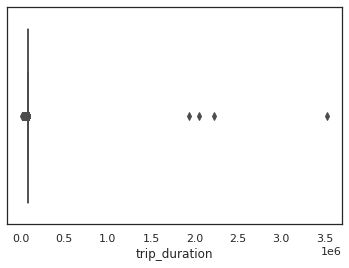

In [12]:
# View outliers
sns.boxplot(x=outlier_1['trip_duration'])
plt.show()

Here we can see that my inital assumption about some of the larger outliers was correct. What my inital observation missed was some the lower outliers that could occur.

## 2. Investigate trip distance

**Z-score**

In [13]:
z_score_2 = np.abs(stats.zscore(df['trip_distance(km)']))
thresh = 3

# position of the outlier
filtered_entries = (z_score_2 > thresh)
outlier_2 = df[filtered_entries]
print('Outliers found',len(outlier_2))

Outliers found 40117


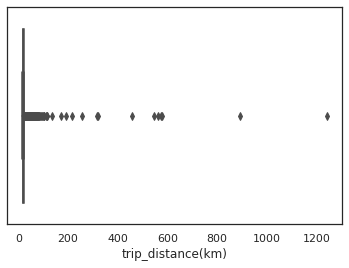

In [14]:
# View outliers
sns.boxplot(x=outlier_2['trip_distance(km)'])
plt.show()

We can see from the outliers above that my initial observation about the values from 200km was correct and that I may have also missed some values that are below 200km.

## 2. Investigate average speed

**Z-score**

In [15]:
z_score_3 = np.abs(stats.zscore(df['avg_speed(km/hr)']))
thresh = 3

# position of the outlier
filtered_entries = (z_score_3 > thresh)
outlier_3 = df[filtered_entries]
print('Outliers found',len(outlier_3))

Outliers found 734


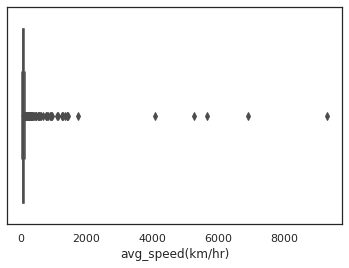

In [16]:
# View outliers
sns.boxplot(x=outlier_3['avg_speed(km/hr)'])
plt.show()

## Droping the outliers from the three feauture observations

In [17]:
# Drop the rows
outliers = outlier_1 + outlier_2 + outlier_3
df = df.drop(outliers.index)

## Display Boxplots after outlier removal

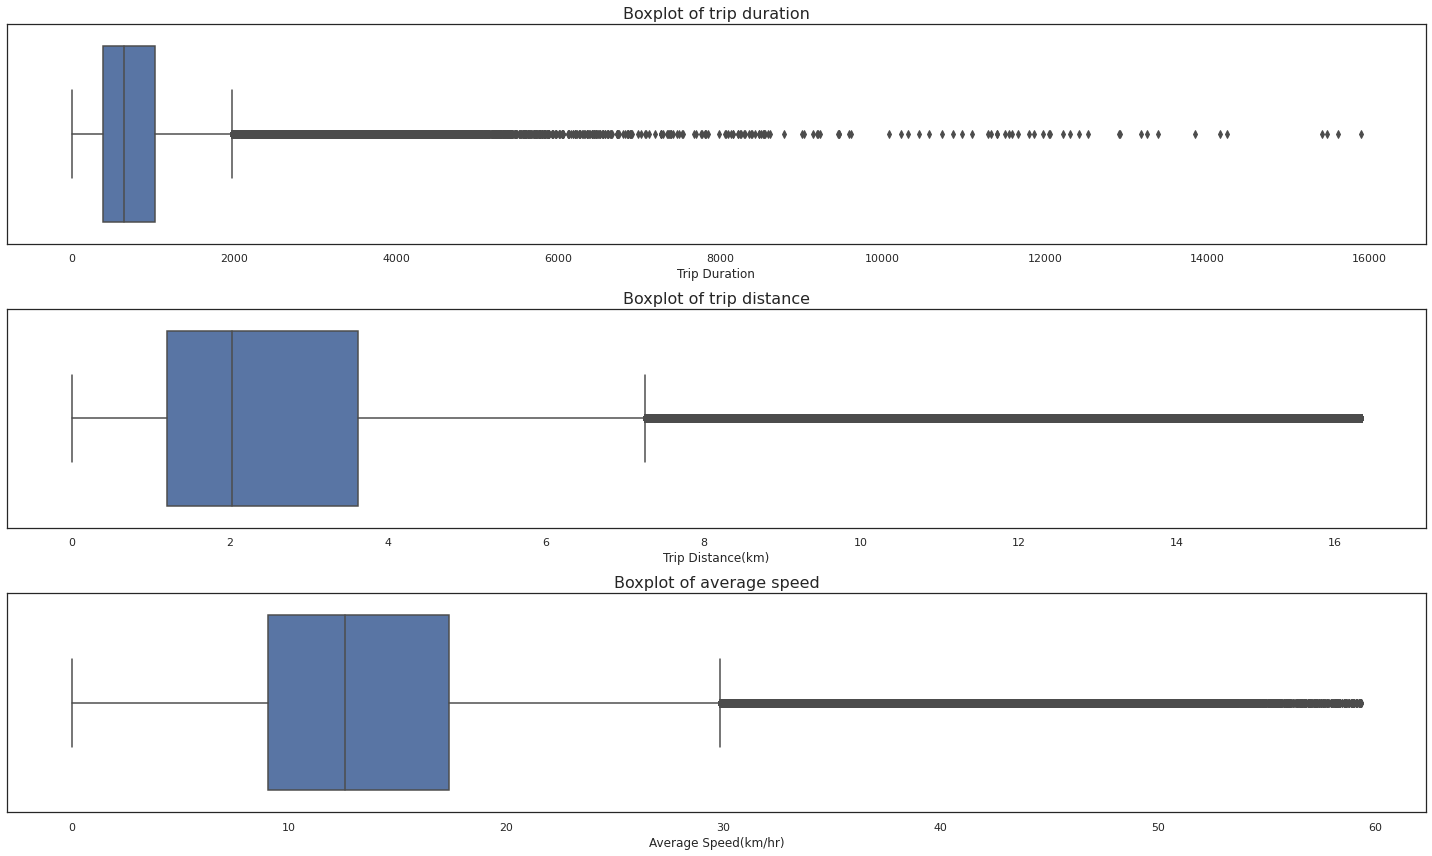

In [18]:
# Plots
fig, axes = plt.subplots(figsize=(20,12),nrows=3, ncols = 1)

sns.boxplot(x=df['trip_duration'], ax=axes[0])
axes[0].set_title('Boxplot of trip duration',fontsize=16)
axes[0].set_xlabel('Trip Duration')

sns.boxplot(x=df['trip_distance(km)'], ax=axes[1])
axes[1].set_title('Boxplot of trip distance',fontsize=16)
axes[1].set_xlabel('Trip Distance(km)')

sns.boxplot(x=df['avg_speed(km/hr)'], ax=axes[2])
axes[2].set_title('Boxplot of average speed',fontsize=16)
axes[2].set_xlabel('Average Speed(km/hr)')

plt.tight_layout()
plt.show()

# Qusetion 1.3

### Question 1.3.1

In [19]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

/home/siyabonga/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


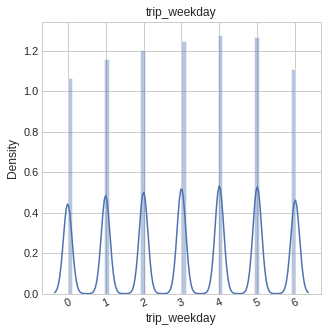

In [20]:
plot_distribution(df[['trip_weekday']], cols=3, width=20, height=5, hspace=0.5, wspace=0.5)

In [21]:
df['trip_weekday'].value_counts().idxmax()

4

Most popular day is friday which is 4

### Question 1.3.2

In [23]:
df['pickup_datetime'] = pd.to_datetime(df['pickup_datetime'])
df['dropoff_datetime'] = pd.to_datetime(df['dropoff_datetime'])

In [24]:
df['trip_hour'] = df['pickup_datetime'].dt.hour

In [25]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km),avg_speed(km/hr),trip_year,trip_month,trip_weekday,trip_hour
id,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.499,11.860220,2016,3,0,17
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806,9.806335,2016,6,6,0
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385,10.822034,2016,1,1,11
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485,12.461538,2016,4,2,19
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189,9.840000,2016,3,5,13


In [26]:
peak_hour_of_day = df.groupby('trip_weekday').agg({'trip_hour':pd.Series.mode})

In [27]:
peak_hour_of_day

,trip_hour
trip_weekday,
0,18
1,18
2,19
3,21
4,19
5,23
6,0


On a Monday most people pickup at 6pm <br>
On a Tuesday most people pickup at 6pm <br>
On a Wednesday most people pickup at 7pm <br>
On a Thursday most people pickup at 9pm <br>
On a Friday most people pickup at 7pm <br>
On a Saturday most people pickup at 11pm <br>
On a Sunday most people pickup at 12am

/home/siyabonga/.local/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


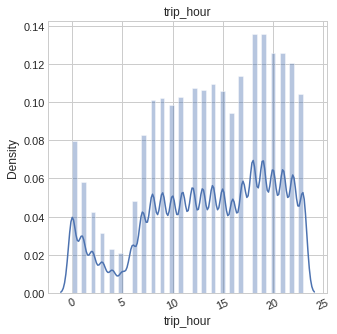

In [28]:
plot_distribution(df[['trip_hour']], cols=3, width=20, height=5, hspace=0.5, wspace=0.5)

Most people pickup at 6pm and 7pm <br>
This can be due to most people are coming back from work at that time

### QUestion 1.3.3

In [29]:
hours_in_day = df.groupby('trip_weekday')['trip_hour'].apply(list)

Weekdays

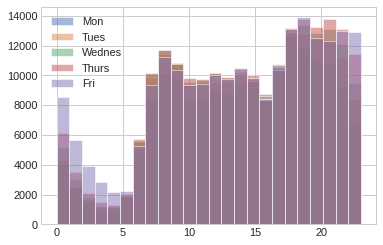

In [30]:
plt.hist(hours_in_day[0], 24,label='Mon',alpha = 0.5)
plt.hist(hours_in_day[1], 24,label='Tues',alpha = 0.5)
plt.hist(hours_in_day[2], 24,label='Wednes',alpha = 0.5)
plt.hist(hours_in_day[3], 24,label='Thurs',alpha = 0.5)
plt.hist(hours_in_day[4], 24,label='Fri',alpha = 0.5)
plt.legend()

Weekends

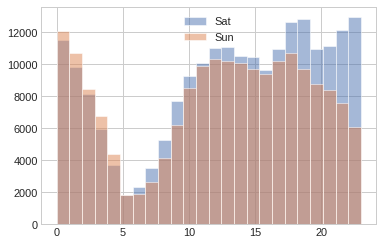

In [31]:
plt.hist(hours_in_day[5], 24,label='Sat',alpha = 0.5)
plt.hist(hours_in_day[6], 24,label='Sun',alpha = 0.5)
plt.legend()

Weekday VS Weekend

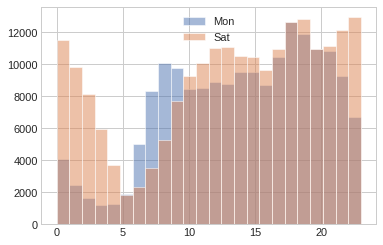

In [32]:
plt.hist(hours_in_day[0], 24,label='Mon',alpha = 0.5)
plt.hist(hours_in_day[5], 24,label='Sat',alpha = 0.5)
plt.legend()

On weekends most people like to pickup at early Morning 12am to 5am. <br>
Saturday is similar to weekdays but there are more pickups in the early hours 12am to 5am <br>
On Sunday after 6pm most people don't pickup anymore. <br>
The early pickups on weekend might be due to people traveling to vist there families, it can also be due to people partying on the weekend. <br>
We can also see that not much pickups happen at 5am to 10am at the weekends, this can be due to people not going to work.

### Question 1.3.4

In [33]:
cal = calendar()
Holidays = cal.holidays(start=df['pickup_datetime'].min(), end=df['pickup_datetime'].max())
df['Holiday'] = df['pickup_datetime'].dt.date.astype('datetime64').isin(Holidays)

In [34]:
Holidays

DatetimeIndex(['2016-01-18', '2016-02-15', '2016-05-30'], dtype='datetime64[ns]', freq=None)

In [35]:
df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km),avg_speed(km/hr),trip_year,trip_month,trip_weekday,trip_hour,Holiday
id,,,,,,,,,,,,,,,,,
id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455,1.499,11.860220,2016,3,0,17,False
id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663,1.806,9.806335,2016,6,6,0,False
id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124,6.385,10.822034,2016,1,1,11,False
id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429,1.485,12.461538,2016,4,2,19,False
id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435,1.189,9.840000,2016,3,5,13,False


In [36]:
Holidays_df = df[df['Holiday'] == True]

In [37]:
Holidays_df.head()

,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration,trip_distance(km),avg_speed(km/hr),trip_year,trip_month,trip_weekday,trip_hour,Holiday
id,,,,,,,,,,,,,,,,,
id0675800,2,2016-02-15 09:25:15,2016-02-15 09:35:49,6,-73.977753,40.754631,-74.001678,40.756420,N,634,2.025,11.498423,2016,2,0,9,True
id2648478,1,2016-01-18 11:13:59,2016-01-18 11:18:56,1,-73.951576,40.766468,-73.960213,40.760540,N,297,0.982,11.903030,2016,1,0,11,True
id1674373,2,2016-02-15 17:52:27,2016-02-15 18:02:13,5,-74.007500,40.740952,-74.016647,40.704910,N,586,4.081,25.070990,2016,2,0,17,True
id2677357,2,2016-02-15 16:36:19,2016-02-15 16:41:50,2,-73.971634,40.781963,-73.981689,40.778996,N,331,0.909,9.886405,2016,2,0,16,True
id3013319,2,2016-02-15 22:28:54,2016-02-15 22:30:27,1,-73.981400,40.778793,-73.976524,40.782497,N,93,0.581,22.490323,2016,2,0,22,True


In [40]:
hours_in_day_holidays = Holidays_df.groupby('trip_weekday')['trip_hour'].apply(list)

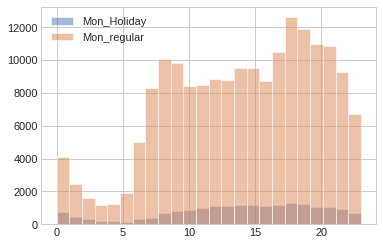

In [41]:
plt.hist(hours_in_day_holidays[0], 24,label='Mon_Holiday',alpha = 0.5)
plt.hist(hours_in_day[0], 24,label='Mon_regular',alpha = 0.5)
plt.legend()

Compared to a noraml Monday, the one on Holiday indicate that they are far less pickups then normal. <br>
This shows that most people don't work or travel on Holidays

### Question 1.3.5

In [42]:
day_speed = df[['pickup_datetime','avg_speed(km/hr)']]

In [43]:
day_speed.head()

,pickup_datetime,avg_speed(km/hr)
id,,
id2875421,2016-03-14 17:24:55,11.860220
id2377394,2016-06-12 00:43:35,9.806335
id3858529,2016-01-19 11:35:24,10.822034
id3504673,2016-04-06 19:32:31,12.461538
id2181028,2016-03-26 13:30:55,9.840000


In [44]:
day_speed_df = day_speed.groupby(pd.Grouper(key='pickup_datetime', freq='60min')).mean().dropna()
day_speed_df.head()

,avg_speed(km/hr)
pickup_datetime,
2016-01-01 00:00:00,15.019020
2016-01-01 01:00:00,14.912572
2016-01-01 02:00:00,16.311287
2016-01-01 03:00:00,16.999992
2016-01-01 04:00:00,17.716125


([<matplotlib.axis.XTick at 0x7f1fc1244fa0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

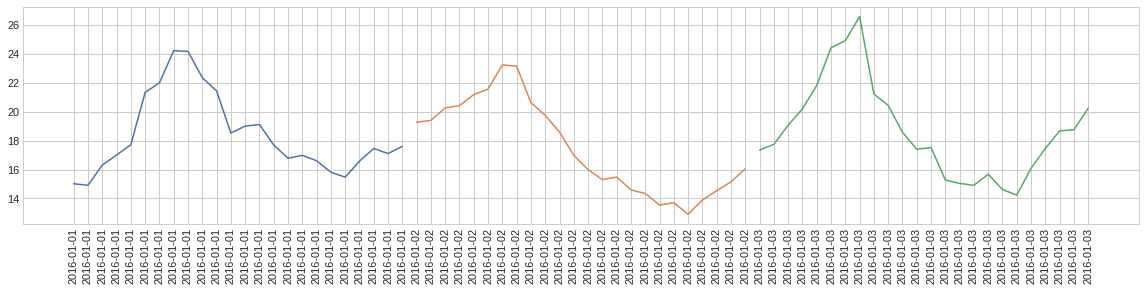

In [45]:
plt.figure(figsize=(20, 4))
plt.plot(day_speed_df.index[:24],day_speed_df.values[:24])
plt.plot(day_speed_df.index[24:48],day_speed_df.values[24:48])
plt.plot(day_speed_df.index[48:72],day_speed_df.values[48:72])
plt.xticks(rotation=90)
plt.xticks(day_speed_df.index[:72])

From the graphs it is seen that at around 5am to 8am the highest average speeds are archieved around 22km/hr to 27km/hr. This can be caused by people rushing to work. <br>
The slowest speeds are around 5pm to 8pm. This is when the taxis travel the slowest below 14km/hr. This can be due to traffic when everyone is returning from work and because people are not necessary in a rush when returning from work.